Use the dataset in EFIplus_medit.zip to perform some hypothesis testing

In [2]:
import pandas as pd

In [ ]:
df = pd.read_csv('../../examples/EFIplus_medit.zip',compression='zip', sep=";")

In [4]:
df.head(5)

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


## Standardize, using z-score, the“Mean Annual Temperature” (Temp_ann), calculate the new mean, SD and 95% confidence interval, and plot the histogram.

In [5]:
# calculate mean of temp_ann
mu = df['temp_ann'].mean()
print(mu)

# calculate standard deviation of temp_ann
sigma = df['temp_ann'].std()
print(sigma)

13.261950010328446
2.172315061311252


Note: I tried to do the below with scipy zscore, and it returned nan for every value, so I calculated it with the mean and standard deviation instead

In [6]:
df['temp_ann_z'] = ((df['temp_ann']-mu)/sigma)

df.head(5)

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp,temp_ann_z
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1.996971
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,-1.823838
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,-1.455567
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,-1.455567
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,-1.363499


In [7]:
df['temp_ann_z'].describe()

,temp_ann_z
count,4.841000e+03
mean,-7.749774e-16
std,1.000000e+00
min,-4.309665e+00
25%,-5.809240e-01
50%,6.354971e-02
75%,6.159558e-01
max,2.319208e+00


In [7]:
import numpy as np
from scipy import stats

std_standard = df['temp_ann_z'].std()
mean_standard = df['temp_ann_z'].mean()

n =len(df['temp_ann_z'])
conf_level = 0.95
degrees_of_freedom = n -1

standard_error = std_standard / np.sqrt(n)

critical_value = 1.96

margin_of_error = critical_value * standard_error

# Calculate the confidence interval
lower_bound = mean_standard - margin_of_error
upper_bound = mean_standard + margin_of_error

print(f"Confidence Interval ({conf_level*100}%): [{lower_bound:.4f}, {upper_bound:.4f}]")

Confidence Interval (95.0%): [-0.0277, 0.0277]


Text(0.5, 1.0, 'Standardised annual river temperature with Confidence Interval')

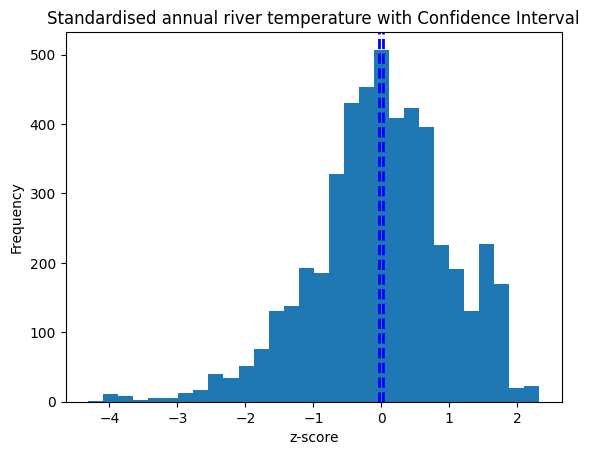

In [8]:
import matplotlib.pyplot as plt

plt.hist(df['temp_ann_z'], bins=30)
plt.axvline(lower_bound, color='blue', linestyle='dashed', linewidth=2, label=f'Lower Bound: {lower_bound:.2f}')
plt.axvline(upper_bound, color='blue', linestyle='dashed', linewidth=2, label=f'Upper Bound: {upper_bound:.2f}')
plt.xlabel('z-score')
plt.ylabel('Frequency')
plt.title('Standardised annual river temperature with Confidence Interval')

## Test whether the means (or medians) of“Mean Annual Temperature” between presence and absence sites of Salmo trutta fario (Brown Trout) are equal using an appropriate test. Use both standardized and non-standardized values and compare results. Please state which is/are the null hypothesis of your test(s)

In [9]:
df_trout_present = df[df['Salmo trutta fario']==1]

df_trout_not_present = df[df['Salmo trutta fario']==0]

Firstly visualise the two sets of sites (brown trout present and not present)

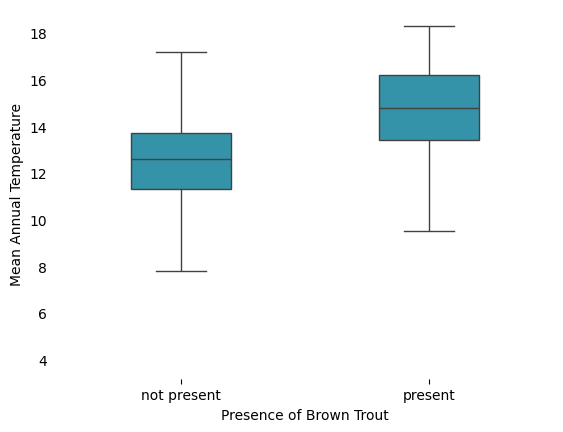

In [10]:
import seaborn as sns

x_labels = ['not present', 'present']

sns.boxplot(
    data= df_trout_present,
    x='Salmo trutta fario',
    y='temp_ann',
    width=0.4,
    fliersize=0,
    color='#219ebc', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    )
sns.boxplot(
    data= df_trout_not_present,
    x='Salmo trutta fario',
    y='temp_ann',
    width=0.4,
    fliersize=0,
    color='#219ebc', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    )
plt.tick_params(left=False) # removes tickmarks
sns.despine(left=True, bottom=True)
plt.xlabel('Presence of Brown Trout')
plt.ylabel('Mean Annual Temperature')
plt.xticks(ticks=[0, 1], labels=x_labels)
plt.show()

Now compare the two sets of sites (non-standardised). Means of temp_ann between the two sites. Check if they are significantly different. describe null hypothesis

In [11]:
trout_pres_mean = df_trout_present['temp_ann'].mean()

trout_not_pres_mean = df_trout_not_present['temp_ann'].mean()

print('mean at sites with trout present: ', trout_pres_mean)
print('mean at sites without trout present: ', trout_not_pres_mean)


mean at sites with trout present:  12.336994219653178
mean at sites without trout present:  14.693684210526316


a t-test can be used if the data is normally distributed and the same variance

In [12]:
# import function
from scipy.stats import shapiro

# normality test
stat, p = shapiro(df_trout_present['temp_ann'])
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs with 3 decimal places
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')


Statistics=nan, p=nan
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


That didn't work, and zscore in scipy didn't work above, so I assume there is an issue with the data. Now let's check if there are null  or other non-float values in temp_ann

In [15]:
# Check for nulls in 'temp_ann' for both dataframes
print("Nulls in df_trout_present['temp_ann']: ", df_trout_present['temp_ann'].isnull().sum())
print("Nulls in df_trout_not_present['temp_ann']: ", df_trout_not_present['temp_ann'].isnull().sum())

# Check for non-numeric values in 'temp_ann'
print("Non-numeric values in df_trout_present['temp_ann']: ", df_trout_present['temp_ann'].apply(lambda x: not isinstance(x, (int, float))).sum())
print("Non-numeric values in df_trout_not_present['temp_ann']: ", df_trout_not_present['temp_ann'].apply(lambda x: not isinstance(x, (int, float))).sum())


Nulls in df_trout_present['temp_ann']:  0
Nulls in df_trout_not_present['temp_ann']:  0
Non-numeric values in df_trout_present['temp_ann']:  0
Non-numeric values in df_trout_not_present['temp_ann']:  0


That makese sense, let's drop those nulls and calculate everything again. The next question will not use these two dataframes, so it will only effect the analysis of this question.

In [14]:
# Remove nulls from 'temp_ann' for both dataframes
df_trout_present = df_trout_present.dropna(subset=['temp_ann'])
df_trout_not_present = df_trout_not_present.dropna(subset=['temp_ann'])


In [16]:
# import function
from scipy.stats import shapiro

# normality test
stat, p = shapiro(df_trout_present['temp_ann'])
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs with 3 decimal places
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=0.944, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


In [17]:
# import function
from scipy.stats import shapiro

# normality test
stat, p = shapiro(df_trout_not_present['temp_ann'])
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs with 3 decimal places
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=0.974, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


The data for temp_ann does not appear to be normally distributed, so the t-test cannot be used. Instead a Mann-Whitney U test can be used. (from the scipy documentation) The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y. It is often used as a test of difference in location between distributions.

In [18]:
from scipy.stats import mannwhitneyu


alpha = 0.05
statistic, p_value = mannwhitneyu(df_trout_present['temp_ann'], df_trout_not_present['temp_ann'])

print('p_value: ')

if p_value < alpha:
    print("The two populations are significantly different (p-value:", p_value, ")")
else:
    print("The two populations are not significantly different (p-value:", p_value, ")")

p_value: 
The two populations are significantly different (p-value: 7.105075261935899e-303 )


And for the z-score standardised data, The previous z-score is incorrect for null values, and that is why the scipy zscore didn't work. The null values should have been removed when the null values for temp_ann were dropped, but let's also check

In [19]:
# Check for nulls in 'temp_ann' for both dataframes
print("Nulls in df_trout_present['temp_ann']: ", df_trout_present['temp_ann_z'].isnull().sum())
print("Nulls in df_trout_not_present['temp_ann']: ", df_trout_not_present['temp_ann_z'].isnull().sum())

Nulls in df_trout_present['temp_ann']:  0
Nulls in df_trout_not_present['temp_ann']:  0


Perfect, now we can calculate if the difference is significant at an alpha of 0.05 (the same as for temp_ann)

In [20]:
statistic_z, p_value_z = mannwhitneyu(df_trout_present['temp_ann_z'], df_trout_not_present['temp_ann_z'])

if p_value_z < alpha:
    print("The two populations are significantly different (p-value:", p_value_z, ")")
else:
    print("The two populations are not significantly different (p-value:", p_value_z, ")")

The two populations are significantly different (p-value: 7.105075261935899e-303 )


The null hypothesis for both tests was that the two populations had the same distribution. Rejecting that null hypothesis means that the two populations had a different distribution with 95% confidence (based on the 0.05 alpha).

## Test whether there are differences in the mean elevation in the upstream catchment (Elevation_mean_catch) among the eight most sampled catchments. For which pairs of catchments are these diferences significant? Please state which is/are the null hypothesis of your test(s).

In [29]:
df['Elevation_mean_catch'].describe()

,Elevation_mean_catch
count,4841.000000
mean,785.177935
std,432.725266
min,52.249944
25%,468.393265
50%,701.438554
75%,1049.983330
max,2545.546876


I'm not sure if I should use the most sampled catchments overall, or most sampled for elevation_mean_catch. I've used the most sampled overall.

In [21]:
# Count the occurrences of each catchment
catchment_counts = df['Catchment_name'].value_counts()

# Get the top 8 most sampled catchments
top_8_catchments = catchment_counts.nlargest(8).index

# Create a new DataFrame with only the top 8 catchments
top_8_df = df[df['Catchment_name'].isin(top_8_catchments)]

top_8_df.head(5)


,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp,temp_ann_z
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,-1.823838
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,-1.455567
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,-1.455567
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,-1.363499
5,ES_02_0005,40.732830,-2.078003,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,-1.225398


Let's check for null and non number values, as this field is of type float

In [22]:
# Check for nulls in 'temp_ann' for both dataframes
print("Nulls in top_8_df['Elevation_mean_catch']: ", top_8_df['Elevation_mean_catch'].isnull().sum())

# Check for non-numeric values in 'temp_ann'
print("Non-numeric values in top_8_df['Elevation_mean_catch']: ", top_8_df['Elevation_mean_catch'].apply(lambda x: not isinstance(x, (int, float))).sum())


Nulls in top_8_df['Elevation_mean_catch']:  143
Non-numeric values in top_8_df['Elevation_mean_catch']:  0


In [23]:
top_8_df = top_8_df.dropna(subset=['Elevation_mean_catch'])


Now let's visualise the catchment distributions

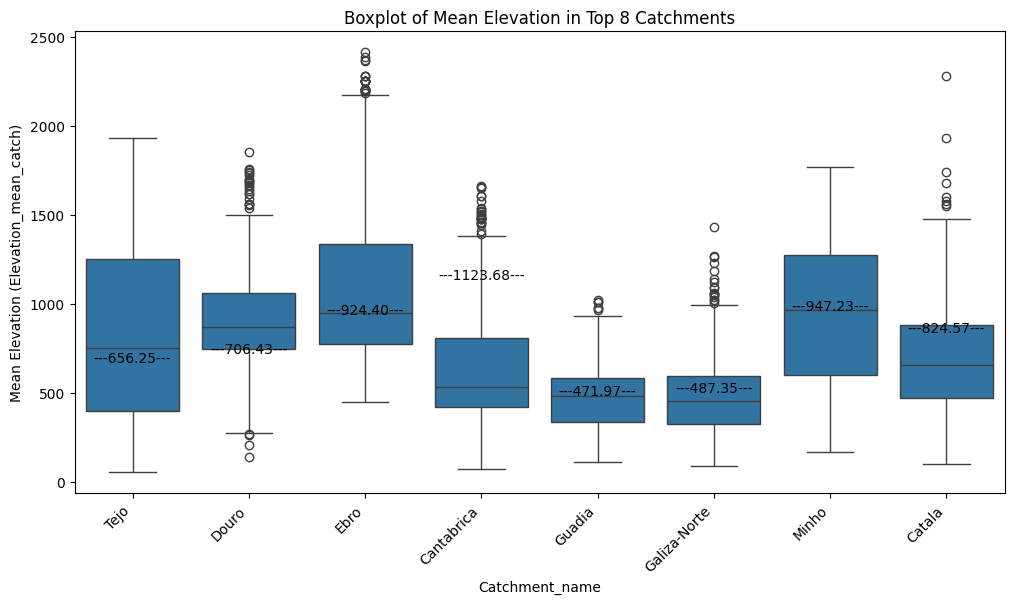

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Catchment_name', y='Elevation_mean_catch', data=top_8_df)
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot of Mean Elevation in Top 8 Catchments')
plt.ylabel('Mean Elevation (Elevation_mean_catch)')

# Calculate and display the mean for each catchment
means = top_8_df.groupby('Catchment_name')['Elevation_mean_catch'].mean()
for i, mean_val in enumerate(means):
  plt.text(i, mean_val, f'---{mean_val:.2f}---', ha='center', va='bottom')

plt.show()


In [33]:
from scipy.stats import f_oneway

# Perform ANOVA test
alpha = 0.05
groups = [top_8_df['Elevation_mean_catch'][top_8_df['Catchment_name'] == name] for name in top_8_catchments]
statistic, p_value = f_oneway(*groups)

print(f"ANOVA statistic: {statistic:.3f}")
print(f"p-value: {p_value:.3f}")

if p_value < alpha:
    print("There is a significant difference in mean elevation among the top 8 catchments.")
else:
    print("There is no significant difference in mean elevation among the top 8 catchments.")

# Perform pairwise t-tests with Bonferroni correction
from statsmodels.sandbox.stats.multicomp import MultiComparison

# Apply the Bonferroni correction
comparison = MultiComparison(top_8_df['Elevation_mean_catch'], top_8_df['Catchment_name'])
result = comparison.allpairtest(stats.ttest_ind, method='bonf')

result[0]


ANOVA statistic: 227.954
p-value: 0.000
There is a significant difference in mean elevation among the top 8 catchments.


group1,group2,stat,pval,pval_corr,reject
Cantabrica,Catala,-1.6422,0.101,1.0,False
Cantabrica,Douro,-11.5247,0.0,0.0,True
Cantabrica,Ebro,-17.4599,0.0,0.0,True
Cantabrica,Galiza-Norte,10.8514,0.0,0.0,True
Cantabrica,Guadia,7.3257,0.0,0.0,True
Cantabrica,Minho,-12.7832,0.0,0.0,True
Cantabrica,Tejo,-5.9873,0.0,0.0,True
Catala,Douro,-8.1133,0.0,0.0,True
Catala,Ebro,-11.8973,0.0,0.0,True
Catala,Galiza-Norte,12.1045,0.0,0.0,True


On the far right hand side of the result above, it can be seen which combinations to reject the null hypothesis for. The null hypothesis is that the distribution of the two sites is not significantly different at an alpha of 0.05

## Which potential problems did you identified in the data that could limit the conclusions derived from the performed tests?

There were many null values in the temp_ann and Elevation_mean_catch data, and so these had to be removed to have accurate calculations, and also to use methods from packages, such as zscore from scipy. These null values needed to be removed before being able to gain insights into the data. They were removed, as opposed to using a replacement value, as we were only interested in one variable for each analysis, and using a value, such as mean or median, would have influenced the distribution for the rest of the analysis.